In [2]:
import os
import glob
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import platform
import seaborn as sns

In [29]:
## Paths Input Here
analysis = r"connectivity_to_adascog11_map_preliminary_analysis"
if platform.uname().system == 'Darwin': #------------------------------Mac OS X---------------------------------------------------------------
    conn_path = r'/Users/cu135/Dropbox (Partners HealthCare)/memory/analyses/spcorrel/spatial_correlation_addbs_t_maps_to_adni1_adascog11_map/spatial_correlation_addbs_t_maps_to_adni1_adascog11_map_correlation_df_prepared_dataframe.csv'
    clin_path = r'/Users/cu135/Dropbox (Partners HealthCare)/memory/patient_data/AD_Clinical_Data_CDR_ADAS_COG_13.xlsx'
    # clin_path = 'path to clinical values'
    out_dir = os.path.join(os.path.dirname(conn_path), f'{analysis}')
    #out_dir = r'path to out dir here'
    # x_roi_names = r'/Users/cu135/Dropbox (Partners HealthCare)/memory/analyses/roi-roi_correl/non_overlap_map_analysis/responder_nonoverlap_rois_final/matrix_corrMx_names.csv'
    #roi_names = '<path to roi name location>'
    print('I have set pathnames in the Mac style')
    print('I will save to:', out_dir)
else: #----------------------------------------------------------------Windows----------------------------------------------------------------
    conn_path = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\roi-roi_correl\matrix_corrMx_AvgR.csv'
    clin_path = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\patient_data\AD_Clinical_Data_CDR_ADAS_COG_13.xlsx'
    # clin_path = 'path to clinical values'
    out_dir = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\AD_to_memory_net'
    #out_dir = r'path to out dir here'
    x_roi_names = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\roi-roi_correl\matrix_corrMx_names.csv'
    #roi_names = '<path to roi name location>'
    print('I have set pathnames in the Windows style')

if os.path.isdir(out_dir) != True:
    os.makedirs(out_dir)

##User Input Goes Here
x_cols = [1] #enter target data columns (indexed from 0)
#x_roi_names = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\spcorrel\vtafxconn-yeoseed\cta_conn_names.csv'
#roi_names = '<path to roi name location>'

data_df = pd.read_csv(conn_path)
# data_df = data_df.reset_index(drop=True)
display(data_df)

I have set pathnames in the Mac style
I will save to: /Users/cu135/Dropbox (Partners HealthCare)/memory/analyses/spcorrel/spatial_correlation_addbs_t_maps_to_adni1_adascog11_map/connectivity_to_adascog11_map_preliminary_analysis


,"Patient # CDR, ADAS",Randomization Arm,Age at DOS,Baseline ADAS-Cog11,Baseline CDR (sum of squares),% Change from baseline (ADAS-Cog11),% Change from baseline (CDR),101,102,103,...,145,146,147,148,149,150,1201,1202,1203,ADNI_1AD_ADAS11_x_vox_tstat (1).nii
0,101.0,sham-stim,62.0,28.0,5.0,-21.428571,-40.000000,1.000000,0.981580,0.982851,...,0.968876,0.864148,0.988506,0.742348,0.963624,0.858183,0.909385,0.937074,0.627642,0.697219
1,102.0,stim-sham,77.0,22.0,6.5,-36.363636,-69.230769,0.981580,1.000000,0.980232,...,0.942206,0.912354,0.946182,0.769017,0.951985,0.892194,0.911070,0.930381,0.677788,0.691142
2,103.0,sham-stim,76.0,19.0,7.0,-78.947368,-42.857143,0.982851,0.980232,1.000000,...,0.984553,0.925811,0.970542,0.817537,0.979312,0.934630,0.951159,0.963605,0.737634,0.702134
3,104.0,stim-sham,65.0,17.0,7.0,-129.411765,-71.428571,0.978848,0.946053,0.961873,...,0.961054,0.829548,0.978816,0.792657,0.974541,0.841648,0.930969,0.960182,0.658638,0.712611
4,105.0,NaN,50.0,19.0,NaN,-10.526316,NaN,0.714252,0.725887,0.735500,...,0.722453,0.677601,0.694699,0.828809,0.808097,0.724246,0.825108,0.846566,0.723858,0.608060
5,106.0,stim-sham,66.0,13.0,3.0,-38.461538,-50.000000,0.980907,0.961016,0.993128,...,0.996430,0.903077,0.983297,0.819080,0.985268,0.919958,0.956889,0.971907,0.730846,0.704759
6,107.0,NaN,64.0,13.0,NaN,-15.384615,NaN,0.808323,0.806368,0.815755,...,0.804329,0.729003,0.792168,0.826459,0.877969,0.765360,0.870915,0.899568,0.710206,0.656691
7,108.0,NaN,60.0,24.0,NaN,-29.166667,NaN,0.745319,0.755790,0.772470,...,0.759161,0.721089,0.726607,0.871874,0.844594,0.767349,0.864982,0.880543,0.768365,0.634771
8,109.0,sham-stim,72.0,23.0,9.0,-30.434783,-44.444444,0.894698,0.918964,0.955945,...,0.942837,0.961752,0.877486,0.927102,0.956540,0.990941,0.981812,0.967560,0.899128,0.672745
9,110.0,sham-stim,72.0,13.0,5.0,-84.615385,-80.000000,0.826374,0.828719,0.897378,...,0.917595,0.896192,0.835254,0.946509,0.922153,0.956983,0.970350,0.950965,0.923054,0.641862


<Figure size 3000x3000 with 0 Axes>

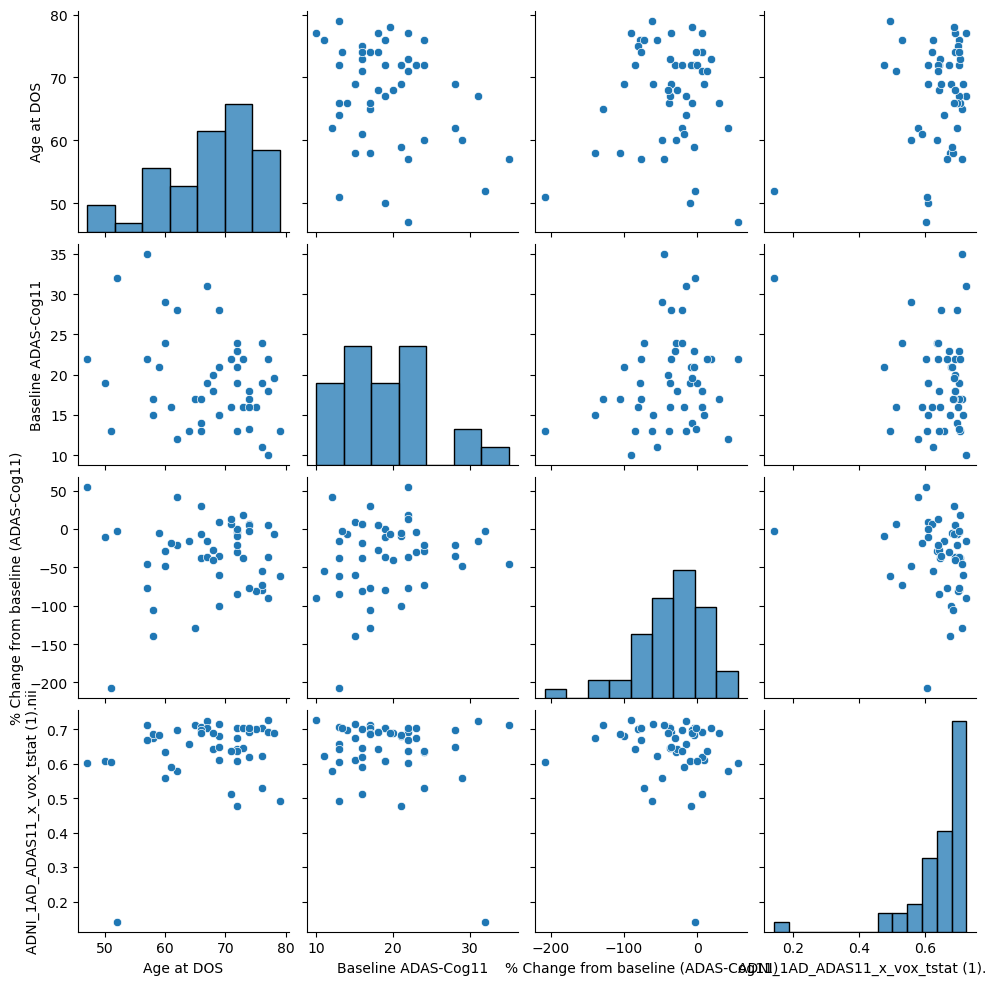

In [34]:
#General Visualization
pairplot = plt.figure(figsize=(30,30))
sns.pairplot(data_df, vars=['Age at DOS', 'Baseline ADAS-Cog11', '% Change from baseline (ADAS-Cog11)', 'ADNI_1AD_ADAS11_x_vox_tstat (1).nii'])

In [20]:
#Descriptive Statistics
description_df = data_df.describe().T
display(description_df)

,count,mean,std,min,25%,50%,75%,max
"Patient # CDR, ADAS",50.0,189.920000,258.695695,101.000000,113.250000,126.500000,140.750000,1203.000000
Age at DOS,50.0,67.480000,7.985293,47.000000,62.000000,69.000000,73.750000,79.000000
Baseline ADAS-Cog11,50.0,19.238000,5.600688,10.000000,15.250000,18.500000,22.000000,35.000000
Baseline CDR (sum of squares),40.0,4.787500,1.727929,1.000000,3.500000,5.000000,5.500000,9.000000
% Change from baseline (ADAS-Cog11),50.0,-35.563519,48.852186,-207.692308,-61.153846,-28.472222,-3.430707,54.545455
% Change from baseline (CDR),38.0,-73.831483,79.163640,-400.000000,-100.000000,-59.615385,-21.250000,11.111111
101,50.0,0.842327,0.171256,0.013199,0.781683,0.900199,0.955309,1.000000
102,50.0,0.848543,0.155886,0.055610,0.798851,0.903516,0.942594,1.000000
103,50.0,0.885349,0.144158,0.145093,0.853359,0.936184,0.976169,1.000000
104,50.0,0.857537,0.154428,0.091140,0.813640,0.903709,0.959019,1.000000


In [21]:
#Outlier Identification by Standard Deviations
import scipy.stats as stats

#Identify columns to assess for outliers
columns_of_interest = [
    '% Change from baseline (ADAS-Cog11)', 'Fx-DBS-Network_N46.nii', 'Baseline ADAS-Cog11'
    
]
outlier_indices = []
for variable in columns_of_interest:
    #Assess and remove outliers from a given column
    data_df_column_outliers = (np.abs(stats.zscore(data_df[variable])) < 2.5)
    # data_df[data_df_column_outliers]
    outlier_indices.append(data_df_column_outliers[data_df_column_outliers==False])
outlier_indices_df = pd.DataFrame(outlier_indices)

display(outlier_indices_df)

,44,16,32
% Change from baseline (ADAS-Cog11),False,NaN,NaN
Fx-DBS-Network_N46.nii,NaN,False,NaN
Baseline ADAS-Cog11,NaN,NaN,False


In [28]:
#Save and finish
pairplot.savefig(os.path.join(out_dir + '/pairplot.png'))
description_df.to_csv(os.path.join(out_dir + '/description.csv'))
outlier_indices_df.to_csv(os.path.join(out_dir + '/outlier_indices.csv'))